In [3]:
# I was having trouble understanding the EMD to do Card Abstraction, so I was making this notebook to better understand

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ot
import time

In [5]:
# The distance to move is independent of what the actual values are. Think about it this way: it's how much you need to walk to move something, not how much weight you are actually carrying.
n = 5  # number of bins
pos_a = np.array([[i] for i in range(n)])
pos_b = np.array([[i] for i in range(n)])

C = ot.dist(pos_a, pos_b, metric='euclidean')
def plot_cost(C):
	plt.figure(figsize=(12,7))
	ax = plt.subplot(131)
	im = plt.imshow(C, cmap='coolwarm')
	plt.title('Cost Matrix')
	cbar = plt.colorbar(im, ax=ax, shrink=0.5, use_gridspec=True)
	cbar.ax.set_ylabel("cost", rotation=-90, va="bottom")

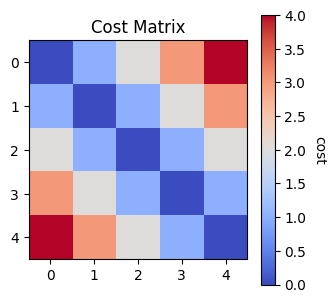

In [6]:
plot_cost(C)

Cost: 4.0


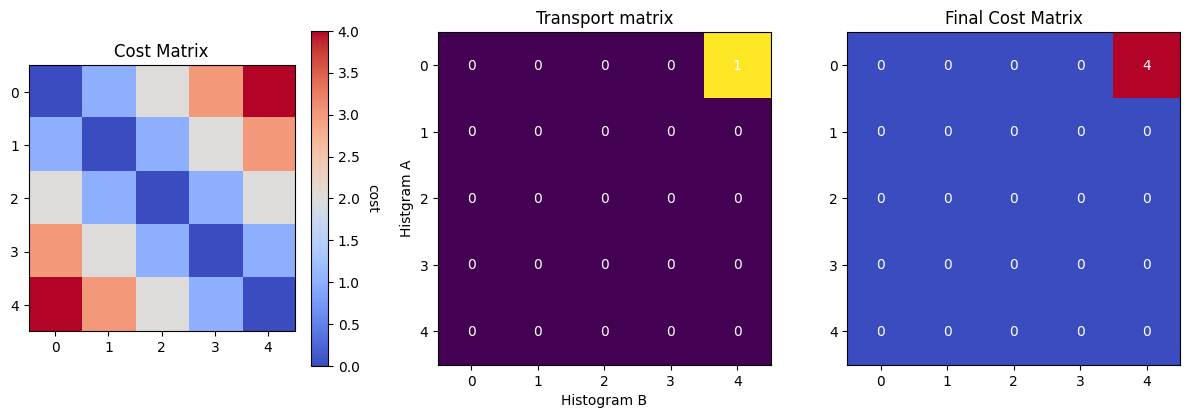

In [7]:
plot_cost(C)
# 1 vs 1. Sample
a_hist = np.array([1.0,0,0,0,0])
b_hist = np.array([0,0,0,0,1.0])
ot_emd = ot.emd(a_hist, b_hist, C)
ax = plt.subplot(132)
im = plt.imshow(ot_emd)
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, '{0:g}'.format(ot_emd[i, j]),
                       ha="center", va="center", color="w")
plt.title('Transport matrix')
plt.xlabel('Histogram B')
plt.ylabel('Histgram A')
plt.tight_layout()
# The cost would be how much you are transporting for each, multipled by the original cost matrix

ax =plt.subplot(133)
transport_cost_matrix = ot_emd * C
plt.imshow(transport_cost_matrix, cmap='coolwarm')
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, '{0:g}'.format(transport_cost_matrix[i, j]),
                       ha="center", va="center", color="w")

plt.title('Final Cost Matrix')
print(f'Cost: {transport_cost_matrix.sum()}')

In [ ]:
def plot_equity_hist(equity_hist, player_cards=None, community_cards=None):
	"""Plot the equity histogram.
	"""
	plt.clf() # Clear Canvas
	plt.hist([i/len(equity_hist) for i in range(len(equity_hist))],[i/len(equity_hist) for i in range(len(equity_hist)+1)], weights=equity_hist)
	plt.ylabel("Probability Mass")
	plt.xlabel("Equity Interval")
	if player_cards:
		player_string = "\nPlayer Cards: " + str(player_cards)
	else:
		player_string = ""
	
	if community_cards:
		community_string = "\nCommunity Cards: " + str(community_cards)
	else:
		community_string = ""

	plt.title("Equity Distribution" + player_string + community_string)
	plt.show(block=False) # to plot graphs consecutively quickly with non-blocking behavior
	plt.pause(0.2)

: 

: 

: 

In [1]:

import sys
import joblib
import os
sys.path.append("../")
import numpy as np
from abstraction import get_filenames, kmeans, kmeans_predict

In [30]:
stage = "flop"
raw_dataset_filenames = get_filenames(f'../data/raw/{stage}')
raw_dataset_filenames = sorted(raw_dataset_filenames)
filename = raw_dataset_filenames[-1]
flop_equity_distributions = np.load(f'../data/raw/{stage}/{filename}')
stage = "turn"
raw_dataset_filenames = get_filenames(f'../data/raw/{stage}')
raw_dataset_filenames = sorted(raw_dataset_filenames)
filename = raw_dataset_filenames[-1]
turn_equity_distributions = np.load(f'../data/raw/{stage}/{filename}')
stage = "river"
raw_dataset_filenames = get_filenames(f'../data/raw/{stage}')
raw_dataset_filenames = sorted(raw_dataset_filenames)
filename = raw_dataset_filenames[-1]
river_equity_distributions = np.load(f'../data/raw/{stage}/{filename}')
print(flop_equity_distributions.shape)
print(turn_equity_distributions.shape)
print(river_equity_distributions.shape)

(100000, 5)
(100000, 5)
(100000, 5)


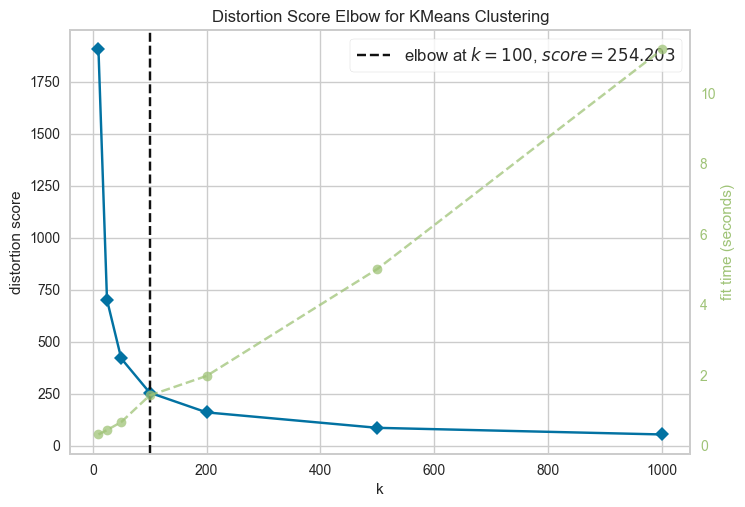

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# # Instantiate the clustering model and visualizer
model = KMeans(n_init=1)
visualizer = KElbowVisualizer(model, k=[10, 25, 50, 100, 200, 500, 1000])
visualizer.fit(flop_equity_distributions)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

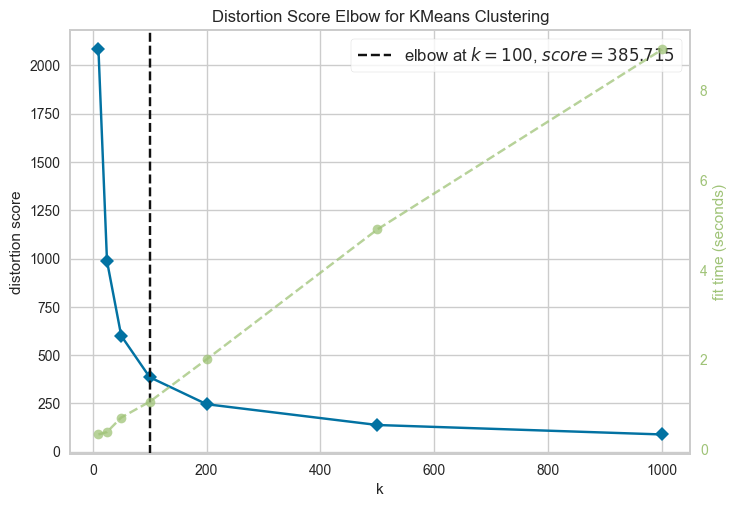

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
model = KMeans(n_init=1)
visualizer = KElbowVisualizer(model, k=[10, 25, 50, 100, 200, 500, 1000])
visualizer.fit(turn_equity_distributions)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

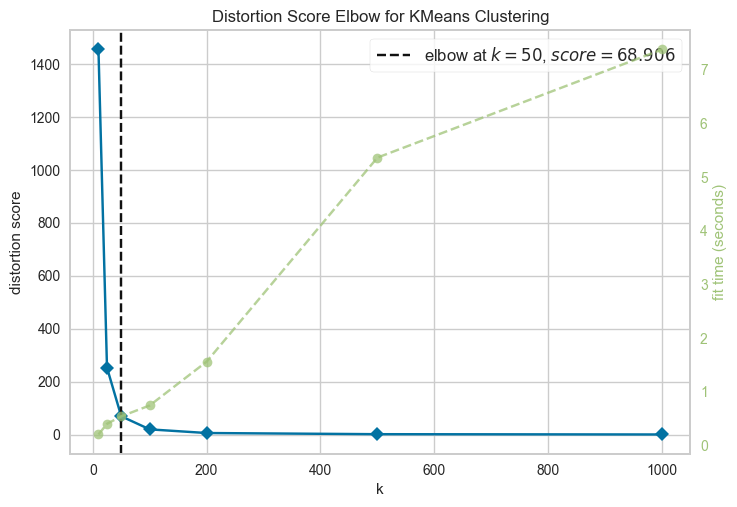

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model = KMeans(n_init=1)
visualizer = KElbowVisualizer(model, k=[10, 25, 50, 100, 200, 500, 1000])
visualizer.fit(river_equity_distributions)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

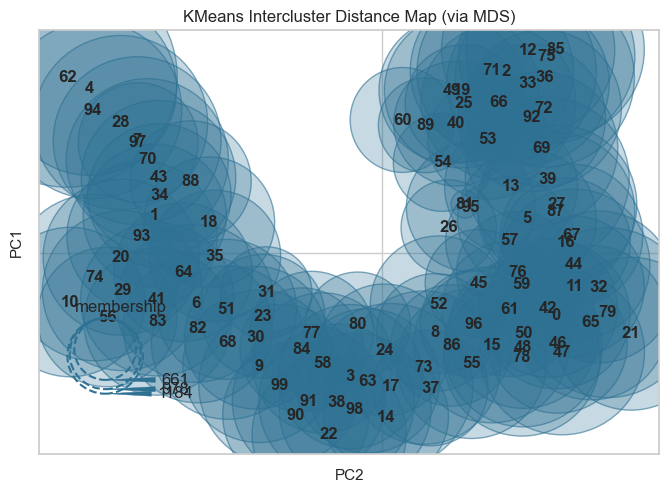

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 12 random clusters

# Instantiate the clustering model and visualizer
model = KMeans(100, n_init=1)
visualizer = InterclusterDistance(model)

visualizer.fit(turn_equity_distributions)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure